In [1]:
# Importing necessary libraries
import pandas as pd
from myfunctions import set_importer, scores, data_preparation, data_cleaner
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_confusion_matrix

sns.set_style("whitegrid")
%matplotlib inline

# setting font size for all plots
font = {'size'   : 16}

plt.rc('font', **font)

In [2]:
# importing the training and testing sets
X_train = set_importer('../analysis-dfs/X_train.csv')
X_test = set_importer('../analysis-dfs/X_test_ordinal_encoded.csv')

y_train = set_importer('../analysis-dfs/y_train.csv', y=True)
y_test = set_importer('../analysis-dfs/y_test_prepared.csv', y=True)



# The best Model

After experimenting with various models, a random forest classifier was found to be the ideal model

In [3]:
class myRandomForestClassifier:
    def __init__(self):
        self.rf_classifier =  RandomForestClassifier(criterion='gini', random_state=21, min_samples_split=70, min_samples_leaf=100, n_estimators=300)
    
    def Xy_cleanprep(self, X, y):
        #1. data cleaning
        X_cleaned, y_cleaned = data_cleaner(X, y)

        # 2. data preparation
        X_ordinal_encoded, X_onehotencoded, y_prepared = data_preparation(X_cleaned, y_cleaned)
        return X_ordinal_encoded, y_prepared
        
    
    def fit(self, X, y):
        
        X_ready, y_ready = self.Xy_cleanprep(X, y)

        columns_to_select = ['gps_height','longitude','latitude','region_code','district_code',
        'population','permit','construction_year','basin','extraction_type_class','payment','quality_group','quantity_group','source_class','waterpoint_type_group']
        

        # Using the SMOTE function
        sm = SMOTE(random_state=21)
        X_re, y_re = sm.fit_resample(X_ready, y_ready)
        return self.rf_classifier.fit(X_re[columns_to_select], y_re)
    
    def predict(self, X_true):
        columns_to_select = ['gps_height','longitude','latitude','region_code','district_code',
        'population','permit','construction_year','basin','extraction_type_class','payment','quality_group','quantity_group','source_class','waterpoint_type_group']
        return self.rf_classifier.predict(X_true[columns_to_select])



In [4]:
# intializing the best model
clf = myRandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=100, min_samples_split=70,
                       n_estimators=300, random_state=21)

In [5]:
y_rf_preds = clf.predict(X_test)
# print('RandomForest Classifier best model results on the training set')
scores(y_test, y_rf_preds)

The precision score is:	 0.8798436991208075
The recall score is:	 0.8357562635323229
The accuracy score is:	 0.7639653815892997
The f1 score is:	 0.857233502538071


In [6]:
y_test.value_counts()

1    6466
0    1160
Name: 0, dtype: int64

In [7]:
pd.Series(y_rf_preds).value_counts()

1    6142
0    1484
dtype: int64

## Confusion matrix

In [8]:
cm = confusion_matrix(y_test, y_rf_preds)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 422  738]
 [1062 5404]]


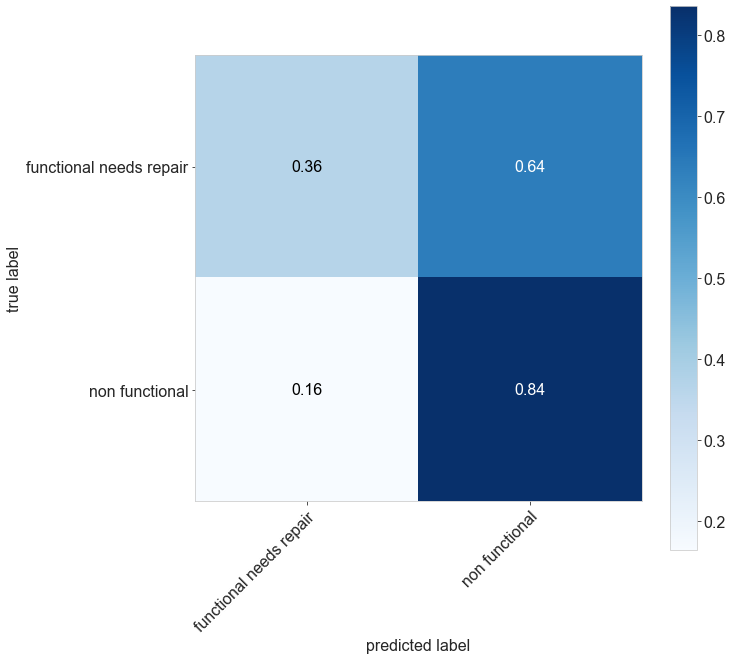

In [17]:
classes = ['functional needs repair', 'non functional']

plot_confusion_matrix(conf_mat = cm,
                      class_names = classes,
                      show_absolute = False,
                      show_normed = True,
                      figsize=(10,10),
                      colorbar = True)
plt.show()                                   

## Interpretating the final model

* Precision-Score - If the model assigns 1 then there is a 88% chance that a water pump is actually non functional.
* Recall-Score - If a given water pump is actually 1 (non-functional) then there is a 83.6% that this model will label it as 1 (non-functional), and a 16.4% chance that it will incorrectly label it as 0 (functional but need repair).
* Accuracy-Score - The model accurately assigns 76.4% to the correct label.